### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Data loading and cleaning

In [2]:
box_office = pd.read_csv('data/box_office.csv')
print(box_office.shape)
box_office.columns

(3000, 203)


Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=203)

##### The dataset contains a total of 203 columns, but not all are needed for this analysis. Therefore, we will select only the necessary columns and create a new dataset, which will be a copy of the main dataset.

In [3]:
# figuring out the columns that we will need for analysis
column = ['id','budget','homepage','imdb_id', 'original_language', 'original_title','overview','popularity','release_date','runtime','tagline',
          'title','revenue','has_collection','num_genres','num_companies','num_countries','num_languages','num_cast','num_crew']
movies_df = box_office[column].copy()
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'runtime',
       'tagline', 'title', 'revenue', 'has_collection', 'num_genres',
       'num_companies', 'num_countries', 'num_languages', 'num_cast',
       'num_crew'],
      dtype='object')

In [4]:
movies_df['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

### Data Visualization


#### Task 1: Visualizing the target variable (Revenue)

<Axes: xlabel='revenue', ylabel='Count'>

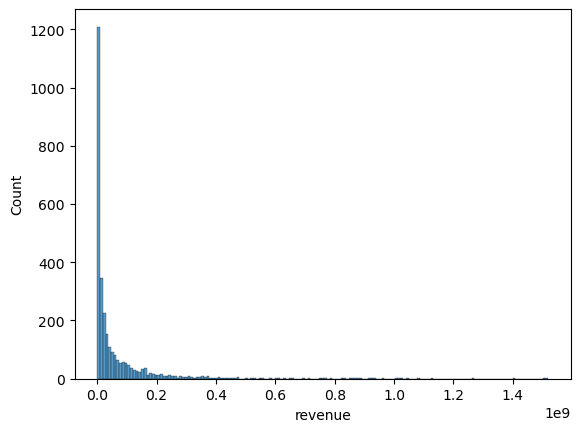

In [5]:
sns.histplot(x = 'revenue', data = movies_df)

##### The graph above is highly skewed, so we’ll apply a logarithmic transformation to enhance the analysis. This adjustment will improve the model’s performance in predicting the target variable, 'revenue'.

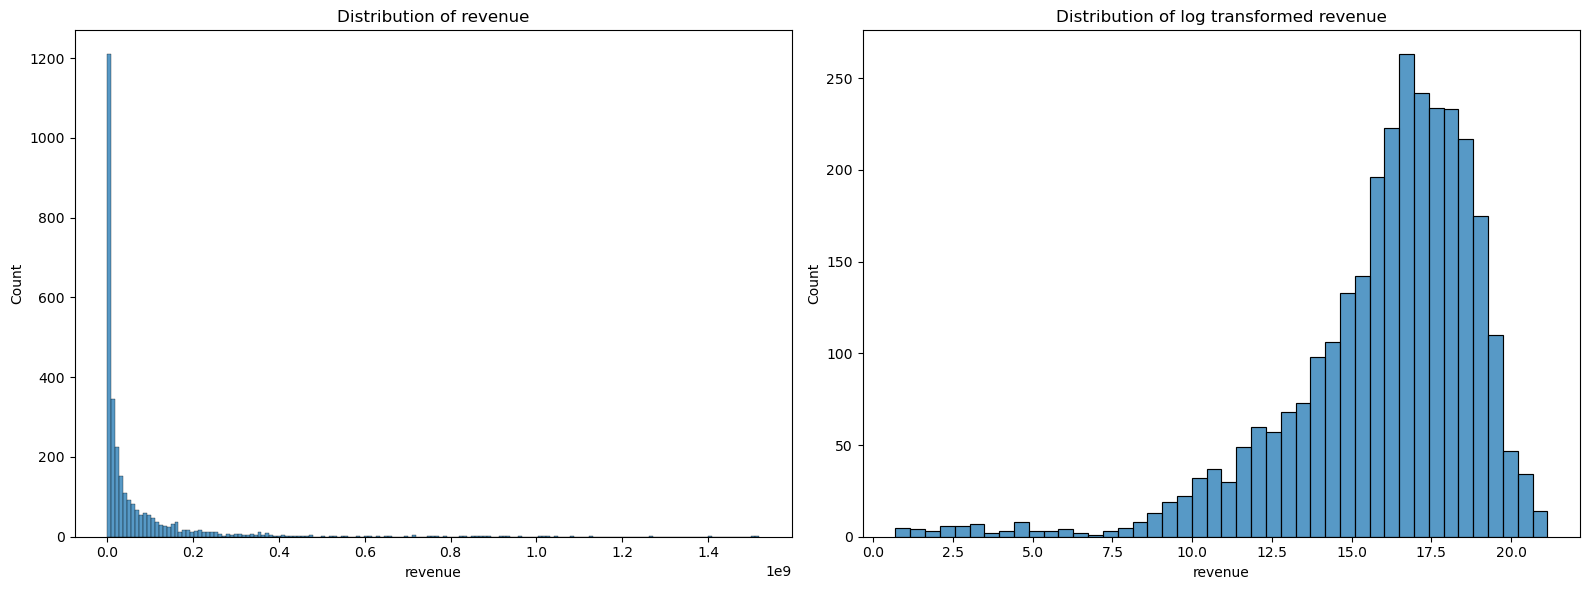

In [6]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(movies_df['revenue'],kde=False);
plt.title('Distribution of revenue');

plt.subplot(1,2,2)
sns.histplot(np.log1p(movies_df['revenue']), kde = False);
plt.title('Distribution of log transformed revenue');

plt.tight_layout()
plt.show()

##### Calculating the interquartile range (IQR) will give us insight into where most data points are concentrated. Specifically, it will show the range between the 25th and 75th percentiles of the revenue data.

In [7]:
movies_df['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [8]:
revenue_stats = movies_df['revenue'].describe()
mean_revenue = revenue_stats.mean()
revenue_q1 = revenue_stats['25%']
revenue_q3 = revenue_stats['75%']
revenue_iqr = revenue_q3 - revenue_q1
revenue_range = [revenue_q1, revenue_q3]

print(f'Average revenue of the movie dataset is = {mean_revenue}.')
print(f'25 percentile of revenue lies at {revenue_q1}.')
print(f'75 percentile of revenue lies at {revenue_q3}.')
print(f'IQR of revenue is = {revenue_iqr}')
print(f'Revenue range where majority of data points lie is = {revenue_range}.')

Average revenue of the movie dataset is = 226490646.12183562.
25 percentile of revenue lies at 2379808.25.
75 percentile of revenue lies at 68919203.5.
IQR of revenue is = 66539395.25
Revenue range where majority of data points lie is = [2379808.25, 68919203.5].


##### To improve analysis of skewed data points, we will add two new columns to the movies dataset: 'log_revenue' and 'log_budget'.

In [9]:
movies_df['log_revenue'] = np.log1p(movies_df['revenue'])
movies_df['log_budget'] = np.log1p(movies_df['budget'])
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'runtime',
       'tagline', 'title', 'revenue', 'has_collection', 'num_genres',
       'num_companies', 'num_countries', 'num_languages', 'num_cast',
       'num_crew', 'log_revenue', 'log_budget'],
      dtype='object')

#### Task 2: Relationship between Film Revenue and Budget

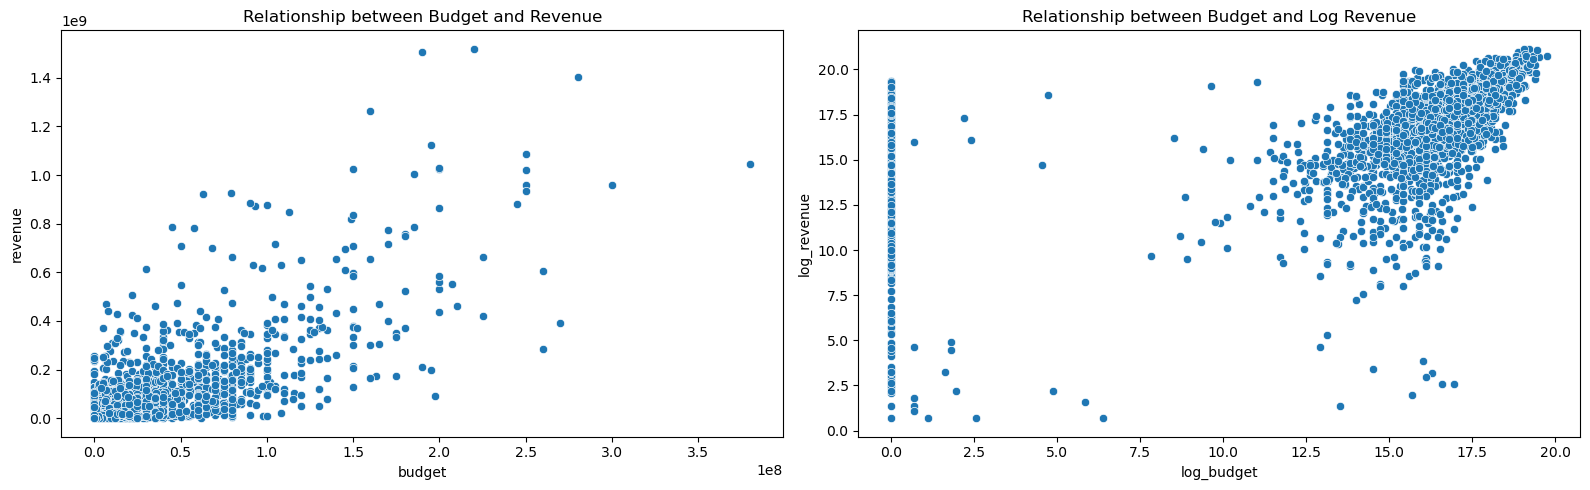

In [10]:
# film revenue and budget may be corelated

plt.figure(figsize = (16,5), tight_layout = True)

plt.subplot(1,2,1)
sns.scatterplot(x = movies_df['budget'], y = movies_df['revenue'])
plt.title('Relationship between Budget and Revenue');

plt.subplot(1,2,2)
sns.scatterplot(x = movies_df['log_budget'], y = movies_df['log_revenue'])
plt.title('Relationship between Budget and Log Revenue');

##### The graphs above reveal a clear correlation between budget and revenue, suggesting that a movie's revenue tends to be influenced by its budget. This implies that higher budgets are likely associated with higher revenues, though other factors may also play a role.

#### Task 4: Impact of having an official homepage on revenue

In [11]:
movies_df['homepage'].value_counts().head(10)

homepage
http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: count, dtype: int64

In [12]:
# creating a boolean feature to check whether the movie have a homepage or not
movies_df['has_homepage'] = 'No'
movies_df.loc[movies_df['homepage'].isnull() == False, 'has_homepage'] = 'Yes'

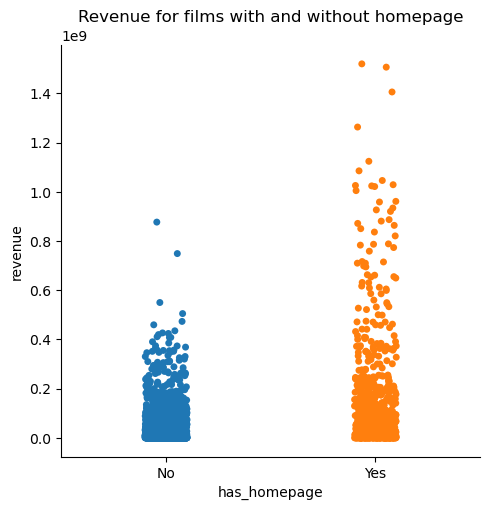

In [13]:
# since 'has_homepage' has categorical function, we use sns.catplot to visualize it
sns.catplot(x = 'has_homepage', y = 'revenue', data = movies_df, hue = 'has_homepage');
plt.title('Revenue for films with and without homepage');

##### The graph shows that movies with a homepage (Category 1) tend to have higher revenue compared to those without a homepage, suggesting a potential impact of having a homepage on revenue.

#### Task 4: Influence of film language on revenue

In [14]:
# getting top 10 languages to compare
language_data = movies_df.loc[movies_df['original_language'].isin(movies_df['original_language'].value_counts().head(10).index),:]
language_data.shape

(2905, 23)

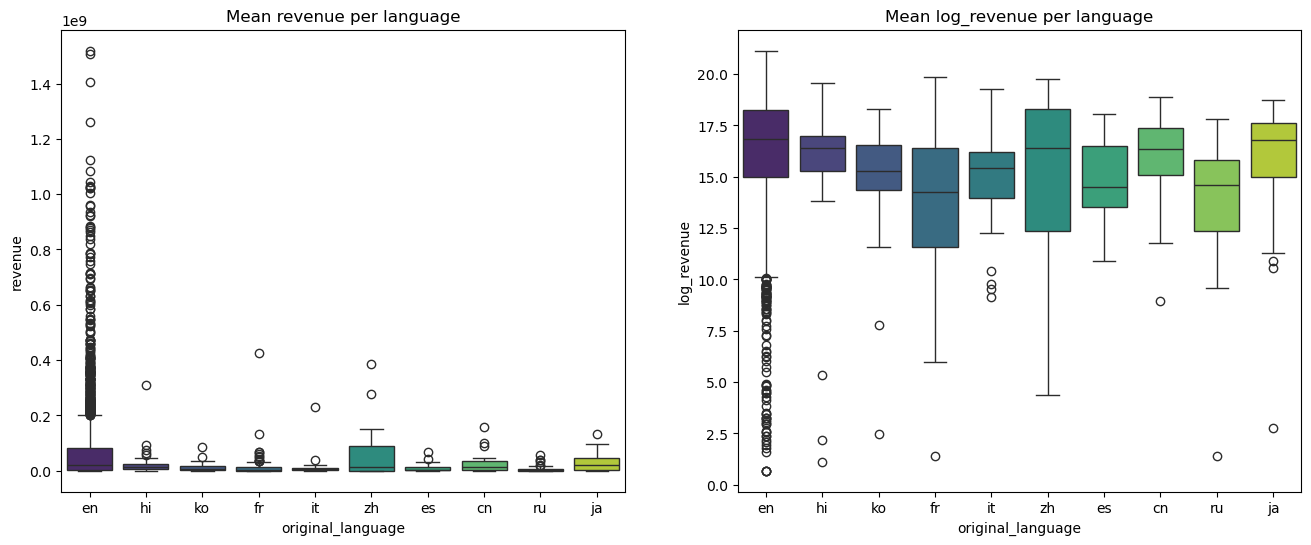

In [15]:
# boxplot is a great tool to identify outliers in the data
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'original_language', y = 'revenue', data = language_data, hue = 'original_language', palette = 'viridis')
plt.title('Mean revenue per language')

plt.subplot(1,2,2)
sns.boxplot(x = 'original_language', y = 'log_revenue', data = language_data, hue = 'original_language', palette = 'viridis')
plt.title('Mean log_revenue per language');

##### The plot shows that, english language movies give maximum revenueThe plot shows that English-language movies tend to generate slightly higher revenue, although the difference between English and non-English language movies is not very significant.

#### Task 5: Effect of changing movie title before release on revenue

In [16]:
movies_df['changed_title'] = 'Yes'
movies_df.loc[movies_df['original_title'] == movies_df['title'], 'changed_title'] = 'No'

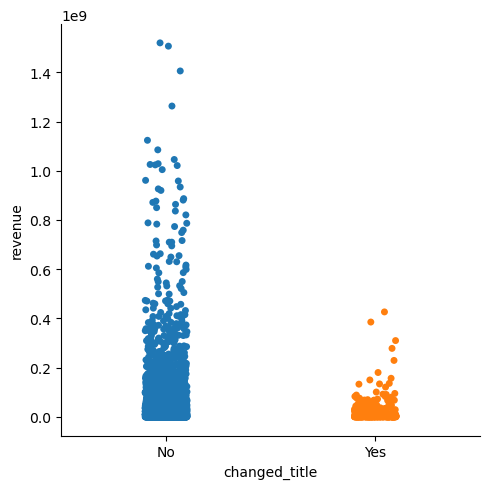

In [17]:
sns.catplot(x = 'changed_title', y = 'revenue', data = movies_df, hue = 'changed_title');

##### The catplot illustrates that altering the movie name does not appear to have any significant impact on the revenue generated.

#### Task 6: The role of having a tagline on revenue

In [18]:
movies_df['has_tagline'] = 'Yes'
movies_df.loc[movies_df['tagline'].isnull() == True, 'has_tagline'] = 'No'
movies_df['has_tagline'].value_counts()

has_tagline
Yes    2403
No      597
Name: count, dtype: int64

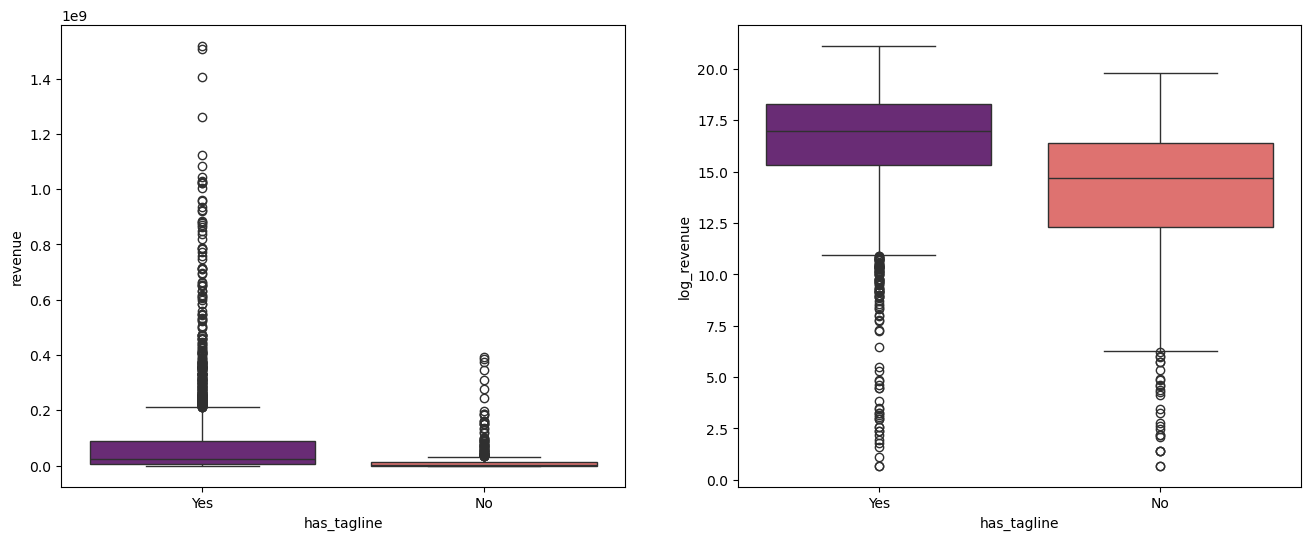

In [19]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'has_tagline', y = 'revenue', data = movies_df, hue = 'has_tagline', palette = 'magma')

plt.subplot(1,2,2)
sns.boxplot(x = 'has_tagline', y = 'log_revenue', data = movies_df, hue = 'has_tagline', palette = 'magma');

##### The data suggests that having a tagline for a movie does affect its revenue, as movies with a tagline tend to generate higher revenue compared to those without one.

#### Task 7: Revenue generation across different release months

In [20]:
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'runtime',
       'tagline', 'title', 'revenue', 'has_collection', 'num_genres',
       'num_companies', 'num_countries', 'num_languages', 'num_cast',
       'num_crew', 'log_revenue', 'log_budget', 'has_homepage',
       'changed_title', 'has_tagline'],
      dtype='object')

In [21]:
release_date = pd.to_datetime(movies_df['release_date'], format = '%m/%d/%y', errors = 'coerce')
movies_df['released_date'] = release_date
movies_df['released_month'] = movies_df['released_date'].dt.month_name()
movies_df.drop(columns = 'released_date', inplace = True)

In [22]:
movies_df['released_month']

0        February
1          August
2         October
3           March
4        February
          ...    
2995        April
2996        March
2997      October
2998      January
2999    September
Name: released_month, Length: 3000, dtype: object

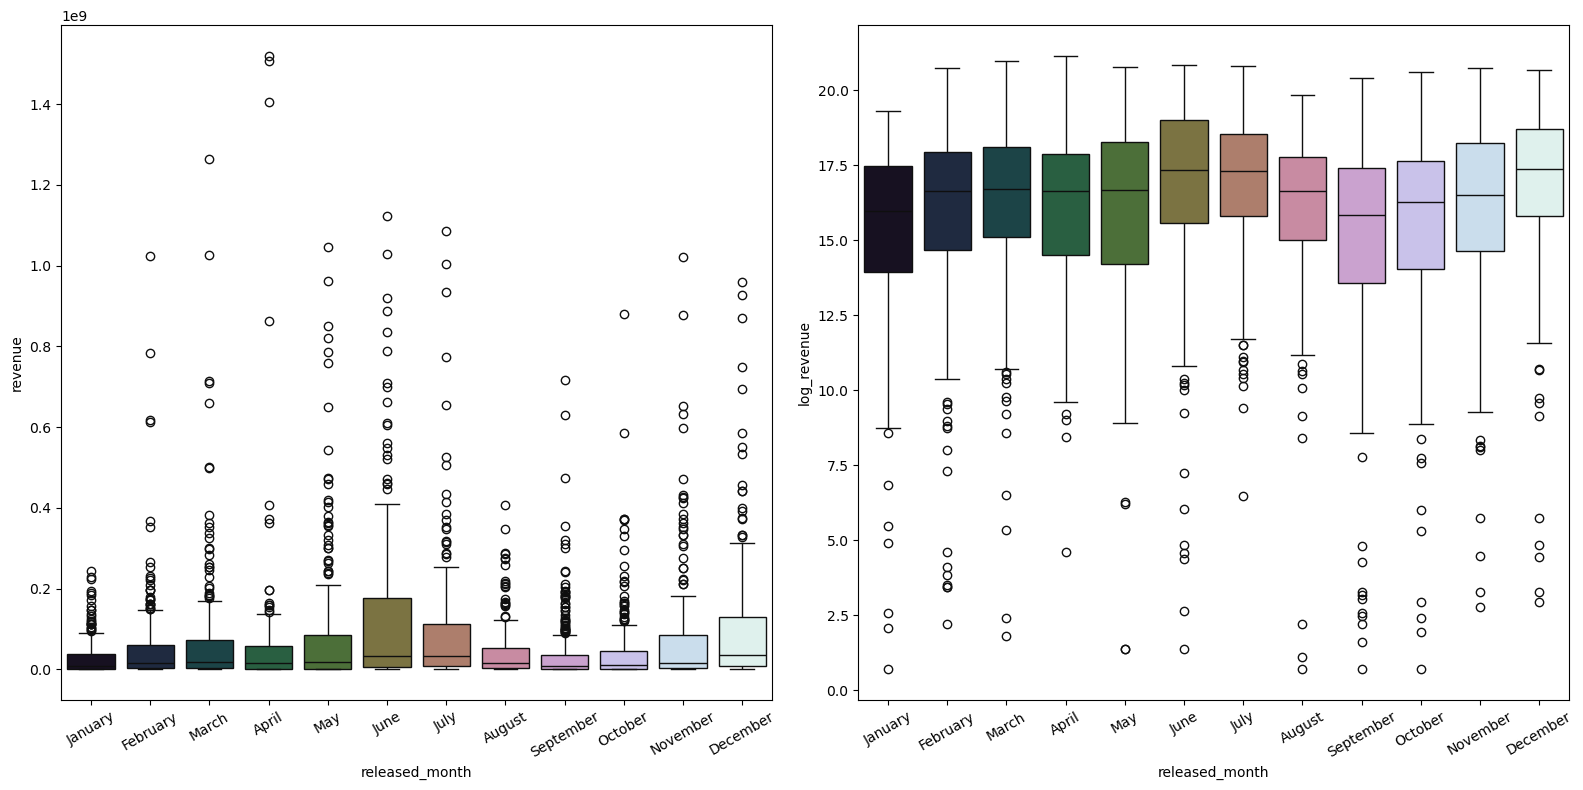

In [23]:
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]             
movies_df['released_month'] = pd.Categorical(movies_df['released_month'], categories=months_order)

fig, ax = plt.subplots(1,2, figsize = (16,8),tight_layout = True)

ax[0] = sns.boxplot(x = 'released_month',y = 'revenue', data = movies_df, ax = ax[0], hue = 'released_month', palette = 'cubehelix')
ax[0].tick_params(axis='x', rotation=30) 

ax[1] = sns.boxplot(x = 'released_month',y = 'log_revenue', data = movies_df, ax = ax[1], hue = 'released_month', palette = 'cubehelix')
ax[1].tick_params(axis='x', rotation=30) 

plt.show()

##### There is no major significant difference in revenue across the months when the movie was released. However, June shows a slight increase in revenue generation compared to other months.

#### Task 8: Descriptive statistics of film runtime

In [24]:
movies_df['runtime'].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [25]:
movies_df['runtime'].isna().value_counts()

runtime
False    2998
True        2
Name: count, dtype: int64

In [26]:
runtime_stats = movies_df['runtime'].describe()
runtime_mean = runtime_stats['mean']
runtime_mean

107.85657104736491

In [27]:
movies_df.loc[movies_df['runtime'].isna() == True, 'runtime'] = runtime_mean

In [28]:
runtime_iqr = [runtime_stats['25%'],runtime_stats['75%']]
print(f'Average runtime of the movies dataset = {runtime_mean}')
print(f'Q1-Q3 range of runtime = {runtime_iqr}')

Average runtime of the movies dataset = 107.85657104736491
Q1-Q3 range of runtime = [94.0, 118.0]


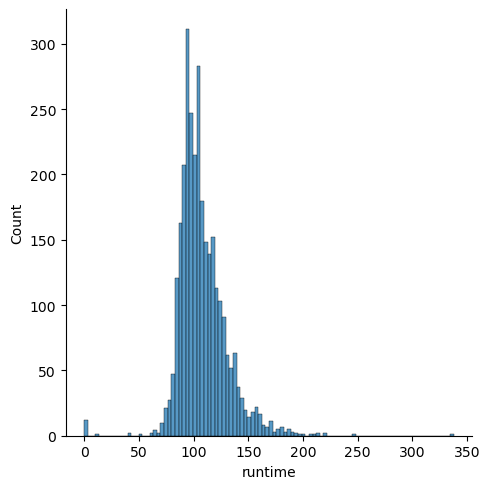

In [29]:
sns.displot(x = 'runtime', data = movies_df);

#### Task 9: Relationship between the number of genres and revenue

In [30]:
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'runtime',
       'tagline', 'title', 'revenue', 'has_collection', 'num_genres',
       'num_companies', 'num_countries', 'num_languages', 'num_cast',
       'num_crew', 'log_revenue', 'log_budget', 'has_homepage',
       'changed_title', 'has_tagline', 'released_month'],
      dtype='object')

In [31]:
movies_df['num_genres'] = movies_df['num_genres'].astype('int64')

In [32]:
movies_df['num_genres'].value_counts()

num_genres
2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: count, dtype: int64

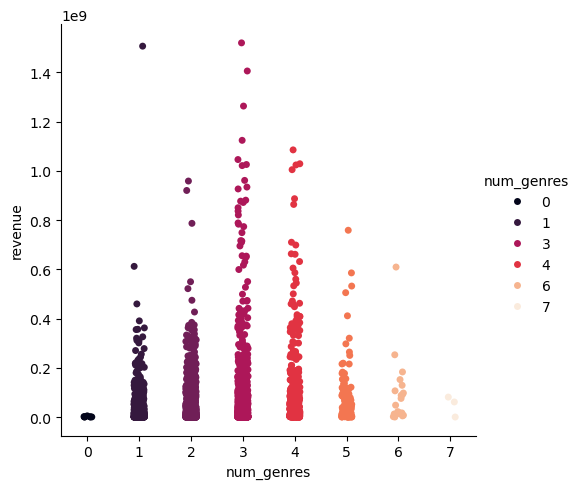

In [33]:
sns.catplot(x = 'num_genres', y = 'revenue', data = movies_df, hue = 'num_genres', palette = 'rocket');

##### The analysis reveals that having multiple genres affects revenue. In the movies dataset, films with three listed genres tend to generate the highest revenue.

#### Task 10: Frequent words in Film Titles and Descriptions

##### A word cloud generates an image where the most frequently used words appear in the largest font, with the font size gradually decreasing as the frequency of the words diminishes.

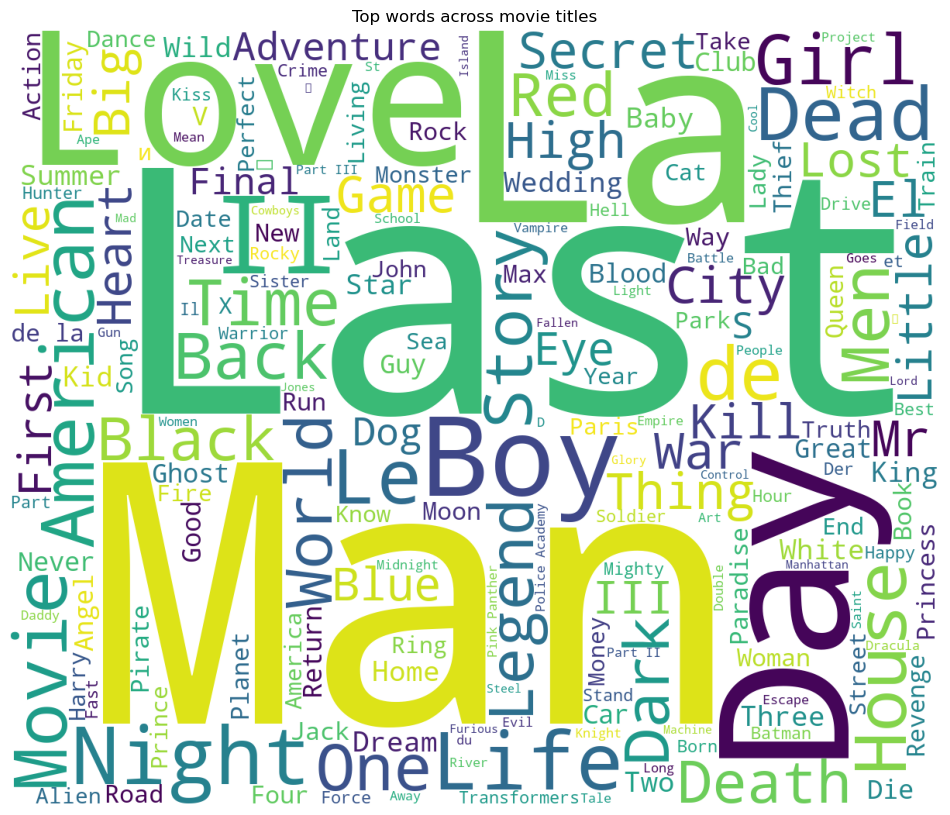

In [34]:
# creating word cloud to identify most frequently used words in film titles and descriptions
plt.figure(figsize = (12,12))
text = ' '.join(movies_df['original_title'].values)
wordcloud = WordCloud(max_font_size = None,
                      background_color = 'white',
                      width = 1200, height = 1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie titles')
plt.axis('off')
plt.show();

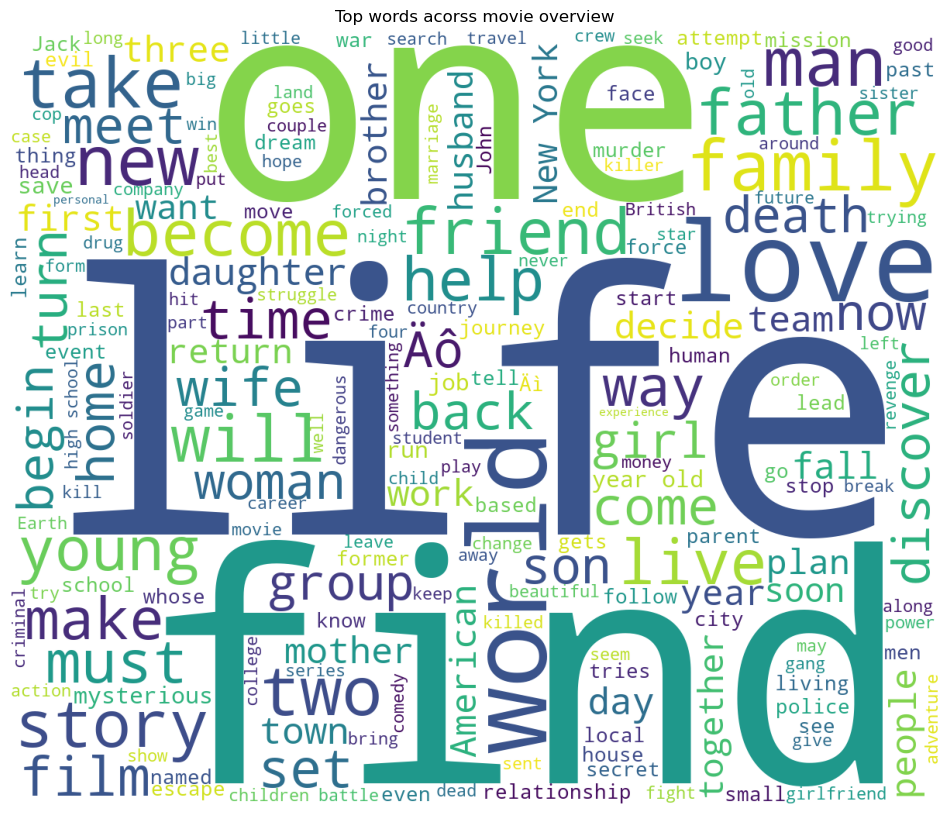

In [35]:
# most frequently used words in description
plt.figure(figsize = (12,12))
text = ' '.join(movies_df['overview'].fillna(' ').values)
wordcloud = WordCloud(max_font_size = None,
                      background_color = 'white',
                      width = 1200, height = 1000).generate(text)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Top words acorss movie overview')
plt.show()